In [1]:
# Add parent folder to path, so that we can import local dh_modelling Python module
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

import numpy as np

from pathlib import Path

from dh_modelling.helpers import load_intermediate

## Features

We have added some additional features to the dataset: categorical hour-of-day, day-of-week and day-of-year variables, in addition to continuous count of seconds starting from 1970-01-01, and boolean column based on holidays and weekends.

The categorical date variables might help in finding out cyclic features, and the continuous in finding a trend in absolute time.

The categorical features miss the nearness of hours 23 and 00, as well as days Sunday and Monday, and day-of-year 365 and 0. Therefore, in a later phase we will experiment if it is worth it to replace those values with their sine and cosine components.

In addition, later we will experiment if adding lagging components of predicted variable will help (e.g. adding y(t-1), y(t-2), ... variables to training set)

In [2]:
df = load_intermediate(Path(module_path)/'data'/'intermediate'/'features.feather')
df

,dh_MWh,Ilman lämpötila (degC),hour_of_day,day_of_week,day_of_year,epoch_seconds,is_business_day
date_time,,,,,,,
2015-01-01 01:00:00+02:00,936.000,4.0,1,3,1,1420066800,0
2015-01-01 02:00:00+02:00,924.200,4.1,2,3,1,1420070400,0
2015-01-01 03:00:00+02:00,926.300,4.2,3,3,1,1420074000,0
2015-01-01 04:00:00+02:00,942.100,3.6,4,3,1,1420077600,0
2015-01-01 05:00:00+02:00,957.100,3.3,5,3,1,1420081200,0
...,...,...,...,...,...,...,...
2020-12-31 19:00:00+02:00,1191.663,1.7,19,3,366,1609434000,1
2020-12-31 20:00:00+02:00,1155.601,1.5,20,3,366,1609437600,1
2020-12-31 21:00:00+02:00,1149.378,1.5,21,3,366,1609441200,1


<AxesSubplot:xlabel='day_of_week', ylabel='dh_MWh'>

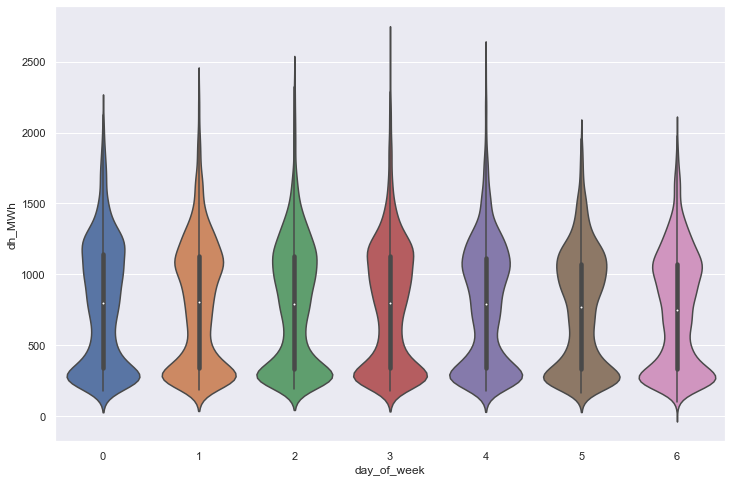

In [3]:
import seaborn as sns
sns.set(rc={'figure.figsize':(12,8)})

sns.violinplot(data=df, x='day_of_week', y='dh_MWh')

<AxesSubplot:xlabel='hour_of_day', ylabel='dh_MWh'>

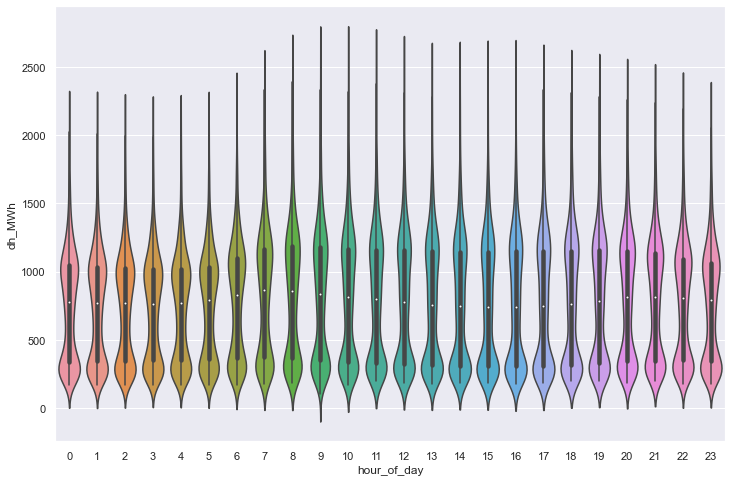

In [4]:
sns.violinplot(data=df, x='hour_of_day', y='dh_MWh')

<AxesSubplot:xlabel='is_business_day', ylabel='dh_MWh'>

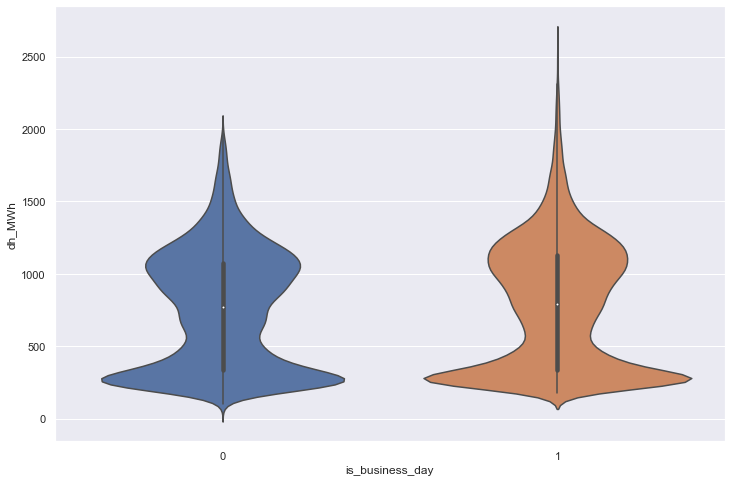

In [5]:
sns.violinplot(data=df, x='is_business_day', y='dh_MWh')